<a href="https://colab.research.google.com/github/tejashwini707/Transforming-health-care-with-AI--Powered-diseases-prediction-based-on-patient-data-1-/blob/main/phase%203%20source%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Step 1: Install dependencies
!pip install scikit-learn pandas

# Step 2: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
# Try importing files if available, otherwise provide alternative
try:
    from google.colab import files  # Import for Google Colab
except ImportError:
    files = None  # Set to None if not in Google Colab
    print("Warning: 'files' object not available. File upload functionality may not work.")

In [17]:
# Step 3: Load dataset and train model
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
# Step 4: Evaluate model
accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 76.62%


In [19]:
# Add these lines at the beginning if the file is missing

# Step 5: Save model again in case it's missing
# (This will retrain the model if the file isn't found)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

joblib.dump(model, 'diabetes_model.pkl')

['diabetes_model.pkl']

In [22]:
# Step 7: Load uploaded file

# Check if 'files' is available (e.g., in Google Colab)
if files is not None:
    uploaded = files.upload()  # Get uploaded files if available

    for filename in uploaded.keys():
        user_df = pd.read_csv(filename)
        print(f"\nUploaded Data Preview:\n{user_df.head()}")
else:
    print("File upload is not supported in this environment.")
    # Provide alternative way to load data (e.g., specify a local file path)
    # user_df = pd.read_csv('your_local_file_path.csv')

Saving diabetes_model.pkl.csv to diabetes_model.pkl.csv

Uploaded Data Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [23]:
# Step 8: Load model and predict
model = joblib.load('diabetes_model.pkl')
# Drop the 'Outcome' column from user_df before prediction
predictions = model.predict(user_df.drop('Outcome', axis=1))


In [24]:

#Step 9: Show results
user_df['DiabetesPrediction'] = ['Likely Diabetic' if p == 1 else 'Unlikely Diabetic' for p in predictions]
print("\nPrediction Results:\n")
print(user_df[['DiabetesPrediction']])


Prediction Results:

    DiabetesPrediction
0      Likely Diabetic
1    Unlikely Diabetic
2      Likely Diabetic
3    Unlikely Diabetic
4      Likely Diabetic
..                 ...
763  Unlikely Diabetic
764  Unlikely Diabetic
765  Unlikely Diabetic
766    Likely Diabetic
767  Unlikely Diabetic

[768 rows x 1 columns]


In [25]:
# Optional: Download results
user_df.to_csv("prediction_results.csv", index=False)
files.download("prediction_results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

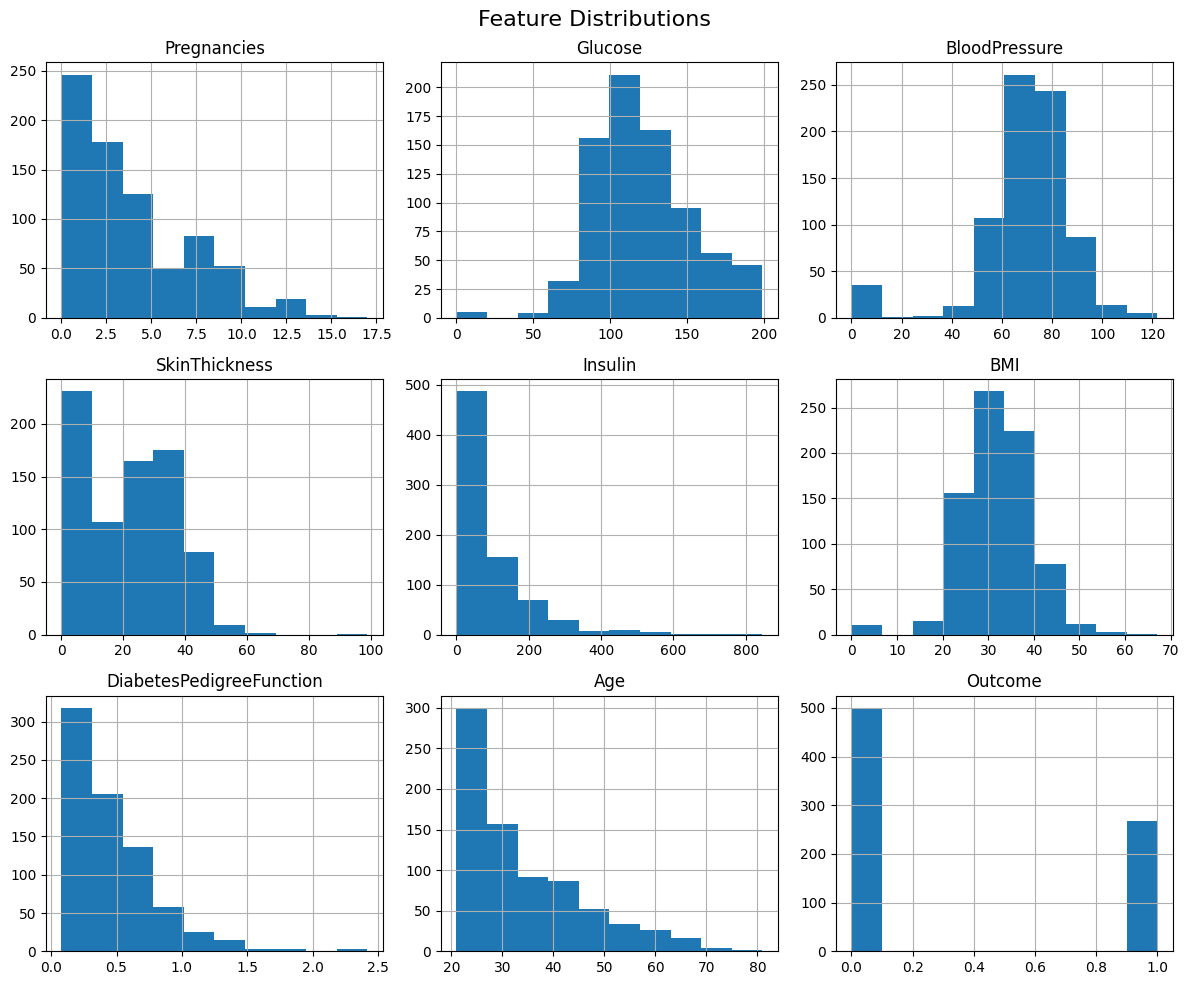

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Reload the dataframe (df)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

# Step 2: Now create the histograms
df.hist(figsize=(12, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

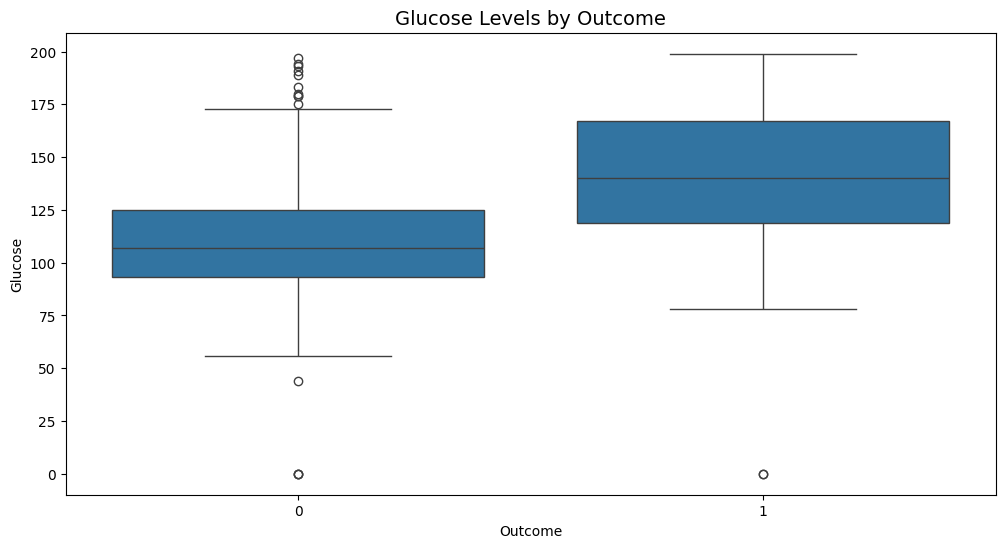

In [27]:
import seaborn as sns

# Create box plots for features grouped by outcome
plt.figure(figsize=(12, 6))
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.title("Glucose Levels by Outcome", fontsize=14)
plt.show()

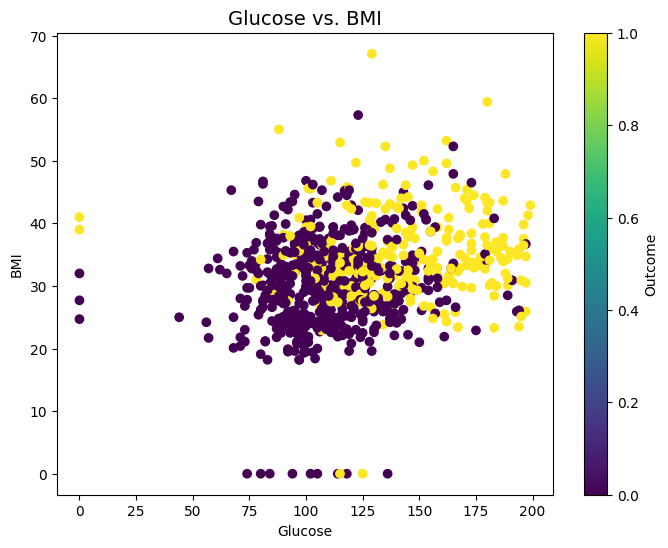

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Glucose"], df["BMI"], c=df["Outcome"], cmap="viridis")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.title("Glucose vs. BMI", fontsize=14)
plt.colorbar(label="Outcome")
plt.show()

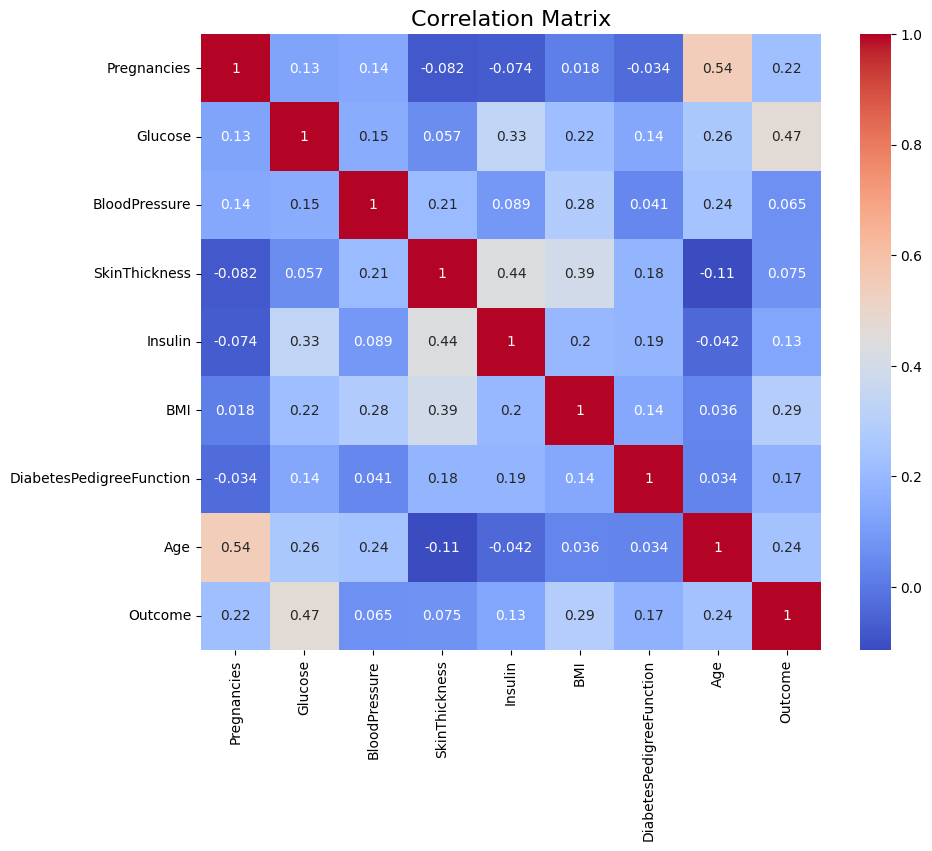

In [29]:
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [30]:
from sklearn.metrics import f1_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib # Make sure joblib is imported

# Step 1: Reload the dataframe (if needed) and train model
# (This assumes you've run the cell that loaded and trained the model previously)
# Otherwise, you need to reload your dataset and train your model again here:
# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
# ... (load and train the model as in your original code) ...

try:
    model = joblib.load('diabetes_model.pkl')  # Attempt to load existing model
except FileNotFoundError:
    print("Model file not found. Please re-train the model.")
    # Add code to load dataset and train the model
    # This prevents crashes if the model file is missing
    url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
    columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
               'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
    df = pd.read_csv(url, names=columns)
    X = df.drop('Outcome', axis=1)
    y = df['Outcome']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

# Generate predictions using the model
predictions = model.predict(X_test)

# Now calculate the F1 score
f1 = f1_score(y_test, predictions)
print(f"\n{'F1 Score:':<15} {f1:.2f}")


F1 Score:       0.66


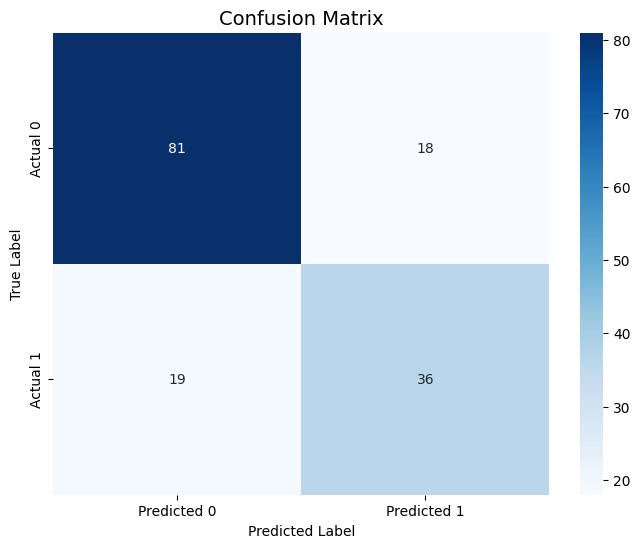

In [31]:
# prompt: code for confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'y_test' and 'predictions' are defined from previous code

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [32]:
!pip install gradio
import gradio as gr
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('diabetes_model.pkl')

# Define the prediction function
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    user_data = pd.DataFrame({
        'Pregnancies': [Pregnancies],
        'Glucose': [Glucose],
        'BloodPressure': [BloodPressure],
        'SkinThickness': [SkinThickness],
        'Insulin': [Insulin],
        'BMI': [BMI],
        'DiabetesPedigreeFunction': [DiabetesPedigreeFunction],
        'Age': [Age]
    })
    prediction = model.predict(user_data)[0]
    return "Likely Diabetic" if prediction == 1 else "Unlikely Diabetic"

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_diabetes,
    inputs=[
        gr.Number(label="Pregnancies"),
        gr.Number(label="Glucose"),
        gr.Number(label="Blood Pressure"),
        gr.Number(label="Skin Thickness"),
        gr.Number(label="Insulin"),
        gr.Number(label="BMI"),
        gr.Number(label="Diabetes Pedigree Function"),
        gr.Number(label="Age")
    ],
    outputs="text",
    title="Diabetes Prediction App"
)

# Launch the interface
iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1d3dbb059bf38a23d8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
